# MATH&ML-4 Математический анализ в контексте задачи оптимизации. Часть 2
###  Содержание <a class="anchor" id=0></a>

- [1. Функции нескольких переменных](#2)
- [2. Частные производные](#2)
- [3. Безусловные экстремумы](#3)
- [4. Введение в оптимизацию](#4)
- [5. Условные экстремумы. Метод Лагранжа](#5)
- [6. Градиент и антиградиент](#6)
- [7. Градиент и градиентный спуск](#7)
- [8. Практика. Градиентный спуск](#8)
- [9. Итоги](#8)

# 1. Функции нескольких переменных <a class="anchor" id=1></a>

[к содержанию](#0)

Задача оптимизации может быть очень сложной, поскольку функция может иметь десятки, сотни, тысячи или даже миллионы входных данных, а структура функции неизвестна, часто недифференцируема и зашумлена.

>Существует функция $n$ переменных $x,y,x,\dots$, если по некоторому закону каждой системе $n$ чисел ($x,y,x,\dots$) из некоторого множества ставится в соответствие число $u$.

То есть, по сути, относительно функции одной переменной меняется только то, что значение функции зависит от нескольких аргументов, а не от одного:

$f(x,y)=x^2y$

>**Примечание**. Исключением из этого правила являются так называемые **векторнозначные функции**, для которых значением может быть не одно число, а несколько:
>
>$f(x)=\left[\begin{array}{} \cos x \\ \sin x \end{array} \right]$

Например, вспомним метод классификации `KNN`. В чём его суть? Ее можно выразить фразой: «Скажи мне, кто твой друг, и я скажу, кто ты». Когда мы получаем обучающую выборку, мы располагаем все её объекты на координатной плоскости (или в пространстве) и затем выбираем количество ближайших соседей. Количество соседей является основным решающим фактором. Обычно это нечётное число. Когда $k=1$, алгоритм называется алгоритмом ближайших соседей. Это самый простой случай.

Далее мы получаем новую точку, для которой неизвестен класс и необходимо предсказать метку. Мы отмечаем эту точку на плоскости (или в пространстве) и находим ближайшую к ней точку из обучающей выборки. Мы присваиваем нашей точке метку найденной ближайшей точки.

На рисунке ниже точки одного класса обучающей выборки отмечены красными звёздочками, а точки другого — зелёными треугольниками. Мы получаем новую точку (знак вопроса) и видим, что ближе всего к ней расположена красная звёздочка. Значит, нашей новой точке мы присваиваем такой же класс.

<img src=m5_img1.png width=400>

А что если $k>1$? Предположим, что $P$ — это точка, для которой необходимо предсказать метку. Сначала вы находите $k$ ближайших к $P$ точек, а затем классифицируете точки большинством «голосов» $k$ соседей. Каждый объект «голосует» за свой класс, и класс с наибольшим количеством «голосов» принимается за прогноз. Чтобы найти ближайшие похожие точки, вычисляются  расстояния между точками с использованием мер расстояния, таких как **евклидово расстояние**, **расстояние Хэмминга**, **расстояние Манхэттена** и **расстояние Минковского**. 

***

Итак, алгоритм `KNN` включает в себя следующие основные шаги:

* Рассчитать расстояния до всех точек.

* Найти ближайших соседей (точки с наименьшим расстоянием).

* Посчитать «голоса» за классы.

<img src=m5_img2.png>

Как уже упоминалось, в этом алгоритме необходимо вычислять расстояние между двумя точками. Для этого используются различные функции нескольких переменных. Рассмотрим самую популярную — **евклидово расстояние**.

Если говорить про евклидово расстояние для двух переменных, то его функция записывается как $f(x)=\sqrt{x^2+y^2}$ и вычисляет корень из суммы квадратов $x$ и $y$. Это не что иное, как расстояние от точки $(x,y)$ до начала координат или длина вектора с координатами $(x,y)$. В качестве области определения для такой функции могут выступать **любые вещественные числа**, а её областью значений являются **все неотрицательные числа**.

**Евклидово расстояние до начала координат**:

$f(x,y) = \sqrt{x^2 + y^2} = \rho (M(x,y), O(0,0)) = \left\|\overrightarrow{r} \right\|$

<img src=m5_img3.png>

Также евклидово расстояние можно использовать для того, чтобы найти **расстояние между двумя точками**:

$f(x,y) = \sqrt{(x-1)^2 + (y-8)^2} = \rho (M(x,y), A(1,8))$

<img src=m5_img4.png>

Также функцией нескольких переменных является **квадратичная функция потерь** или, как её ещё называют, $L^2$-`loss` функция:

$L^2 LossFunction = \sum_{i=1}^{n} (y_{true} - y_{predicted})^2$

Эта функция находит сумму квадратов всех ошибок, то есть, сумму квадратов разностей между реальным значением и значением, предсказанным моделью. Вы уже сталкивались с ней, так как она используется для построения и оценки качества в линейных регрессиях (в методе наименьших квадратов), а также для метода обратного распространения ошибки, применяемого в нейронных сетях.

>Так как эта функция выражает величину отклонения от истины, нам очень важно уметь её исследовать и находить её минимальное значение, чтобы достигать максимально точных предсказаний.

В качестве аргументов функция $L^2$-`loss` принимает любые вещественные числа, а её значения могут быть любыми неотрицательными числами.

Вспомним ещё одну функцию, с которой мы уже сталкивались в одномерном случае — это сигмоида. Сигмоида является функцией активации нейрона, которая используется при обучении нейронных сетей. Её вариацией является логистическая функция, используемая для решения задачи классификации. Если параметров много, то, разумеется, мы получаем её как функцию многих переменных:

$E(y) = \frac{\alpha}{(1 + e^{-(\beta_0 + \beta_1 x_1  + \beta_2 x_2)})}$

Ровно так же, как и одномерная, она может принимать любые значения от 0 до 1 не включительно, и в качестве её аргументов могут выступать любые вещественные числа.

# 2. Частные производные <a class="anchor" id=2></a>

[к содержанию](#0)

>Производные для функций **нескольких переменных** называются частными производными.

На данный момент в машинном обучении очень популярны и эффективны методы глубокого обучения, то есть методы, использующие нейронные сети. В обучении нейронных сетей есть два важных этапа:

* **Прямое распространение ошибки** (на этом этапе нейронная сеть предсказывает результат).

* **Обратное распространение ошибки** (на этом этапе нейронная сеть минимизирует разницу между реальным значением и предсказанным).

Именно на втором шаге большую роль играют частные производные, так как позволяют узнать, каков вклад каждого признака в ошибку, и это даёт возможность точно настроить модель.

>Представьте, что вы решаете много задач по математике: в каких-то ваш ответ абсолютно верен, в каких-то вы ошиблись на сотые, а в каких-то ошибка довольно значительна. Если теперь посчитать, на сколько в среднем вы ошиблись, и вычесть эту среднюю ошибку из всех ответов, скорее всего, все ответы станут неверными. Почему так? Потому что необходимо рассматривать ответ в каждой задаче **независимо от других**.

Так же и в построении модели очень важно иметь возможность рассматривать вес каждого признака независимо и настраивать его отдельно — именно за это отвечают частные производные. Без них пришлось бы корректировать все параметры одновременно и одинаково, и мы бы никогда не получили нормальную модель. Если вы захотите углубиться в изучение различных архитектур нейронных сетей и в принцип их работы в целом, то обязательно столкнётесь с математической записью этого процесса, которая будет содержать в себе частные производные.

Вероятно, вы помните, что обычную производную для функции одной переменной мы обозначали как $\frac{df}{dx}$. Эту запись можно интерпретировать следующим образом: «Очень маленькое изменение значения функции $f$, произошедшее вследствие очень маленького изменения аргумента $x$».

<img src=m5_img5.png width=400>

Важно интуитивно понимать это обозначение, так как оно поможет нам проще разобраться с понятием частных производных.

Давайте перейдём к функциям нескольких переменных и начнём с **функции двух переменных**. Например, с такой:

$f(x,y)=x^2-2xy$

Ничто не мешает нам написать такое же выражение $\frac{df}{dx}$, которое и в этом случае можно будет интерпретировать абсолютно так же: «Очень маленькое изменение значения функции $f$, произошедшее вследствие очень маленького изменения аргумента $x$». Но тут **появляется нюанс**: существование аргумента $y$. Теперь у данных, к которым применяется функция, несколько измерений, а значит изменения могут происходить в нескольких направлениях: то есть мы можем поменять не только $x$, но и немного поменять $y$, вследствие чего значение функции также изменится и мы получим другую производную: $\frac{df}{dy}$.

Разберём пример дифференцирования следующей функции:

$f(x,y)=x^2y^3$

Предположим, мы хотим посчитать производную для этой функции в точке $(3;2)$. Механизм этого действия будет ровно такой же, как и с одномерной функцией.

Вспомним, что производная характеризует скорость изменения одной величины при изменении другой.

Найдём производную по $x$ или, проще говоря, скорость изменения функции: если $x$ изменяется, а $y$ остаётся на месте, то есть, например, если мы перемещаемся из точки $(3;2)$ в точку $(3.01;2)$. Так как $y$ не меняется, мы могли бы сразу заменить его значение в функции на константное:

$x^2 \cdot 2^3 = x^2 \cdot 8$

Теперь мы можем найти производную так, **как будто это функция одной переменной**.

Разумеется, необязательно искать производные в определённых точках — мы можем, как и в случае с одномерными функциями, находить значения производных в общем виде.

Можно сказать, что мы ищем производную для функции $f(x,y)=x^2y^3$ именно по $x$. Таким образом, значение функции будет меняться вследствие изменения значения $x$, а значение переменной $y$ будет оставаться прежним. Раз значение $y$ не будет изменяться, мы можем воспринимать его **как константу**.

<img src=m5_img6.png>

Иногда для того, чтобы подчеркнуть, что это именно многомерная функция, используют следующую запись:

<img src=m5_img7.png>

>
>Есть ли разница в записи между $\frac{d}{dx}$ и $\frac{\partial}{\partial x}$? На самом деле нет, хотя если быть очень педантичными, то можно сказать, что первый вариант используется скорее для функции одной переменной, а второй — для функций нескольких переменных. Но в литературе вы можете встретить оба варианта, и их стоит воспринимать одинаково.

Также вы можете встретить (в том числе и в наших юнитах) следующие общепринятые обозначения:

<img src=m5_img8.png>

Это можно прочитать как «производная от функции $f$ по $x$» или «производная от функции $f$ по $y$» (в зависимости от переменной). Вне зависимости от формы записи, читаются они одинаково, и обе являются верными.

*** 

Конечно, для вывода понятия частной производной можно использовать **геометрическую интерпретацию**. В предыдущем модуле мы уже выяснили, что значение производной в точке равняется тангенсу угла наклона касательной, проведённой в этой точке к графику функции. Но график функции многих переменных — это поверхность, поэтому у неё таких касательных — целая касательная плоскость. Получается, что у функции есть по касательной для каждого направления, а значит и по своей частной производной, так как внутри плоскости можно провести множество касательных.

<img src=m5_img9.png width=400>

Из всех направлений можно выбрать **каноничные** — параллельные координатным осям. Для нас это будет оптимальным решением, так как мы хотим рассмотреть изменение функции только в зависимости от изменения одной из переменных (например, только от $x$ или только от $y$). И если мы, к примеру, берём направление, параллельное оси абсцисс, в таком случае мы фиксируем координату по оси ординат (т. е. воспринимаем её как константу — она одинакова в каждой точке прямой, параллельной оси $x$). Можно варьировать значение $x$. Так мы и поступим и посмотрим, как меняется функция вдоль оси $x$. На рисунке ниже это изменение изображено красной кривой.

<img src=m5_img10.png width=400>

> Отношение приращения вдоль красной кривой к приращению $x$ — и есть значение частной производной по $x$:
>
>$\frac{\partial f}{\partial x} \approx \frac{f(x_0 + \Delta x, y_0) - f(x_0, y_0)}{\Delta x}$

Теперь из всей касательной плоскости можно найти прямую, соответствующую этой красной линии. Тангенс её наклона будет равен частной производной по $x$. 

>Итак, можно сказать, что **алгоритм поиска частной производной** аналогичен алгоритму поиска обычной производной для одномерного случая.
>
>Пусть дана функция. Чтобы найти частную производную по переменной $x_i$:
>
>1. Фиксируем все переменные, кроме $x_i$.
>
>2. Считаем приращение функции при изменении только этой переменной.
>
>3. Делим приращение из пункта 2 на приращение нашей переменной.
>
>4. Уменьшаем $\Delta x_i$ и получаем $\frac{df}{dx_i}$.

В пункте 1 этого алгоритма указано, что мы фиксируем все переменные, кроме одной. Несмотря на то что в разобранных примерах мы рассматривали функции, зависящие от двух аргументов, ровно таким же образом мы можем найти частные производные и для функций трёх, четырёх и более переменных. Такую функцию мы рассмотрим чуть позже.

**Пример № 1**

Найти обе частные производные для функции $f(x,y) = cos(x^2 y) + y^3$.

Для начала найдём производную по $x$ — $f_x'$.

Фиксируем $y$ как константу и дифференцируем:

$f'(x) = (cos(x^2 y))'_x + (y^3)'_x = -sin(x^2 y) \cdot (x^2 y)'_x + 0 = -sin(x^2 y) \cdot 2xy = -2xy \cdot sin(x^2 y)$

Повторим то же самое по $y$ — $f_y'$:

$f'(y) = (cos(x^2 y))'_y + (y^3)'_y = -sin(x^2 y) \cdot (x^2 y)'_y + 3y^2 = -sin(x^2 y) \cdot x^2 + 3y^2 = -x^2 \cdot sin(x^2 y) + 3y^2$

**Пример № 2**

Найти обе частные производные для функции $f(x,y) = e^{x^2 + y^2}$

$f'(x) = (e^{x^2 + y^2})'_x = e^{x^2 + y^2} \cdot (x^2 + y^2)'_x = e^{x^2 + y^2} \cdot 2x$

$f'(y) = (e^{x^2 + y^2})'_y = e^{x^2 + y^2} \cdot (x^2 + y^2)'_y = e^{x^2 + y^2} \cdot 2y$

**Пример № 3**

Найти обе частные производные для функции $f(x,y) = \frac{1}{xy}$.

$f'(x) = \left ( \frac{1}{xy} \right )'_x = \left ( \frac{1}{y} \cdot x^{-1} \right )'_x = - \frac{1}{y} \cdot x^{-2} = - \frac{1}{x^2 y}$

$f'(x) = \left ( \frac{1}{xy} \right )'_y = \left ( \frac{1}{y} \cdot x^{-1} \right )'_y = - \frac{1}{x} \cdot y^{-2} = - \frac{1}{y^2 x}$



**Пример № 4**

Найти все частные производные для функции $t(x,y,z) = xe^y + ye^z$.

$t'_x = (xe^y + ye^z)'_x = (x \cdot e^y)'_x + (y \cdot e^z)'_x = (x)'_x \cdot e^y + y \cdot (e^z)'_x = 1 \cdot e^y + x \cdot 0 = e^y$

$t'_y = (x \cdot e^y + y \cdot e^z)'_y = (x \cdot e^y)'_y + (y \cdot e^z)'_y = x \cdot (e^y)'_y + e^z \cdot (y)'_y = x \cdot e^y + e^z$

$t'_z = (x \cdot e^y + y^z)'_z = (x \cdot e^y)'_z + (y \cdot e^z)'_z  0 + y \cdot (e^z)'_z = y \cdot e^z=$

Так же, по аналогии с одномерными функциями, мы можем найти и вторые частные производные.

Для вторых производных используются следующие обозначения:

<img src=m5_img11.png width=600>

Также могут использоваться такие вариации:

<img src=m5_img12.png width=600>

Рассмотрим пример вычисления всех вторых частных производных для функции $f(x,y) = sin(x) y^2$.

Для начала вычислим первые частные производные по $x$ и по $y$:

<img src=m5_img13.png width=300>

Теперь для каждой из двух частных производных возьмём ещё по две частных производных, чтобы получить все четыре возможных частных производных:

<img src=m5_img14.png width=500>

>Можно заметить, что **значения смешанных производных** (когда ищем производную сначала по одной переменной, а затем — по другой) **совпадают**. Это свойство очень поможет нам при поиске минимумов и максимумов функции, так как сильно упростит расчёты: получается, что для функции с двумя переменными нужно вычислить не четыре производных, а только три. Уже в следующем юните вы сможете по достоинству оценить, как это упростит вам жизнь и сократит длительность вычислений.
>
><img src=m5_img15.png>

Примеры, которые мы разбирали выше, подразумевали, что **переменные**, от которых зависит наша функция, **являются независимыми**. Но что, если они тоже зависят друг от друга?

В таком случае мы можем найти **полную производную**, то есть производную, в которой учитываются зависимости между переменными. По сути, задача поиска полной производной сводится к замене одной из переменных на функциональную зависимость от другой и поиск производной по единственной оставшейся переменной.

**Пример № 5**

Найти полную производную для функции $f(x,y) = x^2 + y^2$ по $x$, если $y=\ln x$.

$f(x,y(x)) = x^2 + y^2(x) = x^2 + (ln \ x)^2$

$\frac{df(x,y(x))}{dx} = (x^2 + y^2(x))'_x = 2x + 2y \cdot y' = 2x + 2ln \ x \cdot \frac{1}{x}$

Разумеется, мы можем вычислять частные производные с помощью уже известной нам библиотеки `SymPy`. По сути, в коде ничего не меняется — надо лишь не забыть указать, по какой переменной вы ищете производную.

Например, попробуем найти производную для функции $f(a,b,c) = 5ab = a*cos(c) + a2+c8*b$ по переменной $a$:

In [1]:
from sympy import symbols, cos, diff

a, b, c = symbols('a b c', real=True)
f = 5*a*b - a*cos(c) + a**2 + c**8*b

print(diff(f, a))

2*a + 5*b - cos(c)


In [11]:
from sympy import symbols, diff

x, y, z = symbols('x y z', real=True)
f = x**2+3*x*y+4*y**2

print(diff(f, x))
print(diff(f, y))

2*x + 3*y
3*x + 8*y


# 3. Безусловные экстремумы <a class="anchor" id=3></a>

[к содержанию](#0)

Теперь, когда мы научились находить частные производные, можно перейти к поиску **экстремумов** (то есть минимумов и максимумов) для функций нескольких переменных.



Как мы помним из предыдущего модуля, нахождение экстремумов даёт возможность минимизировать функцию, так как в реальных задачах функционал ошибки может быть довольно сложным. Например, он может предстать в таком виде:

<img src=m5_img16.png width=500>

Нам важно найти самую низкую точку (т. е. наименьшее значение функции), чтобы понять, при каких параметрах ошибка будет минимальной, а значит качество модели будет максимально возможным.

Так же, как и у функции одной переменной, у функции нескольких переменных могут быть локальные и глобальные минимумы и максимумы:

<img src=m5_img17.png width=500>

К счастью, методы нахождения экстремумов для функций нескольких переменных похожи на методы, которые мы использовали в вычислении с одной переменной. Поэтому для начала давайте вспомним, как искать экстремумы для функции одной переменной

### Рассмотрим алгоритм поиска минимумов и максимумов для функции **нескольких переменных** 

$f(x,y) = x^2 - 10x + y^2 -12y + 71$

1. **На первом этапе** необходимо найти частные производные этой функции:

$f_x(x,y) = 2x-10$

$f_y(x,y) = 2y-12$

2. **На втором этапе** мы находим точки, в которых эти производные принимают нулевые значения:

|$2x-10 = 0$|$2y-12 = 0$|
| - | - |
| $2x=10$ | $2y=12$ |
| $x=5$ | $y=6$ |

Итак, мы получили точку $(5;6)$ — это стационарная точка.

В этой точке может быть: 

| максимум | минимум | седло |
| - | - | - |
| <img src=m5_img18.png width=300> | <img src=m5_img19.png width=300> | <img src=m5_img20.png width=300> |

3. Наконец, переходим к **третьему шагу** — определению того, чем будет являться стационарная точка.

В одномерном случае нам удалось обойтись только первой производной для определения характера точек экстремума. Для функции двух переменных этого недостаточно — нам понадобится новый инструмент, **матрица Гессе**. Помимо оптимизации, она пригодится для определения характера выпуклости функции многих переменных.

>**Матрица Гессе** — это матрица вторых частных производных.

Матрица Гессе для функции двух переменных выглядит так:

<img src=m5_img21.png width=300>

>Интересно, что, несмотря на 
большую важность матрицы Гессе как промежуточного итога в решениях задачи оптимизации, есть и отдельные области, где она применяется как самостоятельный инструмент. Например, она используется в финансовых вычислениях (в риск-менеджменте и для управления портфелями): c её помощью оценивают, насколько опцион подвержен риску. В вычислительной химии матрица Гессе используется для расчётов переходных состояний в химических реакциях.



Рассмотрим пример составления матрицы Гессе для нашей функции:

$f'x = 2x - 10; \ f'y = 2y - 12$

$f''_{xx} = (2x- 10)'_x = 2$

$f''_{xy} = (2x - 10)'_y = 0$

$f''_{yx} = (2y - 12)'_x = 0$

$f''_{yy} = (2y - 12)'_y = 2$

$Hesse = \begin{pmatrix} 2 & 0 \\ 0 & 2 \\ \end{pmatrix}$

Теперь нам необходимо вспомнить линейную алгебру, так как критерии для максимума и минимума следующие:

* Если матрица Гессе положительно определена в этой точке, то в ней находится **минимум**.

* Если матрица Гессе отрицательно определена в этой точке, то в ней находится **строгий максимум**.

* В иных случаях точка является **седловой**.
 
Напомним, что для того, чтобы матрица была положительно определённой, необходимо, чтобы все её угловые миноры либо все собственные значения были положительными. А для того, чтобы матрица была отрицательно определённой, необходимо, чтобы знаки угловых миноров чередовались, начиная с отрицательного, либо чтобы все собственные значения были отрицательными.

В нашем случае знак первого углового минора положителен (его значение равно 2), как и знак второго углового минора (его значение равно 4). Оба собственных значения также положительны (оба равны 2). Это значит, что в данной точке находится минимум.

Найдите матрицу Гессе для функции $f(x,y) = e^x + 5y^3 x$:

In [25]:
from sympy import Symbol, diff, E
from sympy.matrices import Matrix
x = Symbol('x') 
y = Symbol('y') 
f = E**x+5*x*y**3
Matrix([[diff(f,x,x),diff(f,x,y)],[diff(f,y,x),diff(f,y,y)]])

Matrix([
[ exp(x), 15*y**2],
[15*y**2,  30*x*y]])

**Пример № 1**

Исследовать на экстремумы функцию $f(x) = -x^2 + 6x - 2y^2 + 4y$

1. Найдём частные производные функции и приравняем их к нулю:

$f'(x) = (-x^2 + 6x - 2y^2 + 4y)'_x = -2x + 6 - 0 + 0 = -2x + 6 = 0$

$f'(y) = (-x^2 + 6x - 2y^2 + 4y)'_y = 0 + 0 -4y + 4 = -4y + 4 = 0$

$\left\{\begin{matrix} f'_x = -2x + 6 = 0\\ f'_y = -4y + 4 = 0\end{matrix}\right.$

2. Найдём координаты для стационарной точки, то есть, такие значения $x$ и $y$, в которых частные производные принимают нулевые значения:

$\left\{\begin{matrix} x = 3\\ y = 1\end{matrix}\right.$

3. Составим матрицу Гессе:

$f''_{xx} = (-2x + 6)'_x = -2$

$f''_{xy} = f''_{yx} = (-2x + 6)'_y = 0$

$f''_{yy} = (-4y + 4)'_y = -4$ 

$Hesse = \begin{pmatrix} f''_{xx} & f''_{xy}\\ f''_{yx} & f''_{yy}\\ \end{pmatrix} = \begin{pmatrix} -2 & 0\\ 0 & -4\\ \end{pmatrix}$

4. Найдём собственные значения и определим характер точки:

$\begin{vmatrix} -2 - \lambda & 0\\ 0 & -4 - \lambda\\ \end{vmatrix} = 0$

$(-2 - \lambda)(-4 - \lambda) = 0$

$\lambda = -2; \ \lambda = -4$

Собственные числа:

$\left\{\begin{matrix} \lambda_1 = -2 < 0\\ \lambda_2 = -4 < 0\end{matrix}\right. \Rightarrow$ Таким образом, матрица Гессе определена отрицательно, а значит $M(3;1)$ — точка **локального максимума**.


**Пример № 2**

Найти экстремумы для функции $z = x^3 + 3xy^2 -15x - 12y + 1$.

In [27]:
from sympy import *
 
x, y = symbols('x, y')
eq1 = Eq(3*x**2+3*y**2-15,0)
eq2 = Eq(6*x*y-12, 0)
 
sol = solve([eq1, eq2], [x, y])
sol

[(-2, -1), (-1, -2), (1, 2), (2, 1)]

В итоге получим четыре стационарные точки — $M_1 (1;2), M_2 (-1;-2), M_3 (2;1), M_4 (-2;-1)$. Для нас это нечто новое. Составим матрицу Гессе в общем виде, а затем будем подставлять каждую точку и определять, чем она является.

In [34]:
from sympy import solveset, Eq
f_1 = (1-x)*(1-x)-144 
f_2 = (-12-x)*(-12-x)-36 
f_3 = (12-x)*(12-x)-36 
f_4 = (-6-x)*(-6-x)-144 
print('M_1:',solveset(Eq(f_1, 0), x))
print('M_2:',solveset(Eq(f_2, 0), x))
print('M_3:',solveset(Eq(f_3, 0), x))
print('M_4:',solveset(Eq(f_4, 0), x))

M_1: {-11, 13}
M_2: {-18, -6}
M_3: {6, 18}
M_4: {-18, 6}


***
Также иногда мы можем определить, что минимум или максимум являются глобальными. Для этого необходимо помнить следующее:

* Если других экстремумов нет, то экстремум глобальный.

* Если $E_f$ уходит в $+\infty$, глобального максимума не будет.

* Если $E_f$ уходит в $-\infty$, глобального минимума не будет.

* У выпуклых функций локальный экстремум является глобальным.
***

**Задание 3.4**

Найдите экстремумы функции $z = 4x^2 - 6xy -34x + 5y^2 + 42y + 7$.

In [38]:
from sympy import Symbol, diff, Eq
from sympy.matrices import Matrix
x = Symbol('x') 
y = Symbol('y') 
f = 4*x**2-6*x*y-34*x+5*y**2+42*y+7 # запишем функцию
eq1 = Eq(diff(f,x),0) # найдём производную по х
eq2 = Eq(diff(f,y), 0) # найдем производную по у
sol = solve([eq1, eq2], [x, y]) # решим систему уравнений
sol

{x: 2, y: -3}

**Задание 3.5**

Вычислите матрицу Гессе для функции $f(x,y) = x^3 - 2xy - y^6$ в точке $(1;2)$ и найдите её определитель:

In [45]:
f = x**3-2*x*y-y**6
gesse = Matrix([[diff(f,x,x),diff(f,x,y)],[diff(f,y,x),diff(f,y,y)]]) # Запишем матрицу Гессе
gesse.subs([(x,1),(y,2)]) # Подставим значения в точке (1;2)
det(gesse.subs([(x,1),(y,2)])) # Посчитаем детерминант

-2884

**Задание 3.9**

Найдите экстремумы функции $z = x^3 + y^3 - 3xy$.

In [61]:
f = x**3+y**3-3*x*y
eq1 = Eq(diff(f,x),0) # найдём производную по х
eq2 = Eq(diff(f,y), 0) # найдем производную по у
sol = solve([eq1, eq2], [x, y]) # решим систему уравнений
print(sol[:2])
gesse = Matrix([[diff(f,x,x),diff(f,x,y)],[diff(f,y,x),diff(f,y,y)]]) # Запишем матрицу Гессе
print(gesse.subs([(x,0),(y,0)]))
print(gesse.subs([(x,1),(y,1)]))
f_1 = -x**2+9
f_2 = (6-x)*(6-x)-9
print('M_1:',solveset(Eq(f_1, 0), x))
print('M_2:',solveset(Eq(f_2, 0), x))

[(0, 0), (1, 1)]
Matrix([[0, -3], [-3, 0]])
Matrix([[6, -3], [-3, 6]])
M_1: {-3, 3}
M_2: {3, 9}


# 4. Введение в оптимизацию <a class="anchor" id=4></a>

[к содержанию](#0)

>**Оптимизация функций** — это задача нахождения набора входных данных целевой функции (то есть её аргументов), которые приводят к минимуму или максимуму функции.

С такой задачей в Data Science сталкиваются практически постоянно. В литературе даже можно встретить утверждение, что Data Science стоит на «трёх китах математики»:

* линейной алгебре;

* математической статистике;

* оптимизации.

Если сформулировать очень кратко, то задача оптимизации заключается в том, чтобы найти максимум или минимум функции:

$min f(x)$

$max f(x)$

При этом функция $f$ может принимать на вход одну переменную, вектор из нескольких переменных или другой объект, но возвращать всегда будет число. Функция может быть абсолютно любой, например:

* элементарной функцией;

* функцией потерь модели предсказаний (например, количество топлива, которое потратит грузовик, если будет ехать по маршруту $x$, или заработная плата в зависимости от времени, потраченного на обучение).

Как правило, необходимо найти значение функции и аргумента $x$, который приводит к оптимальному значению.

Иногда на $x$ накладывается какое-нибудь дополнительное условие:

$min_{a<x<b} \ f(x)$

$min_{g(x) \geq 0} \ f(x)$

Например, нельзя потратить на обучение отрицательное количество часов. Также невозможно тратить на это больше 24 часов в сутки.

Чаще всего ограничение выражается равенством или неравенством на другую функцию от $x$. Например, грузовики должны проехать по всем пунктам маршрута, т. е. имеем ограничение «количество посещённых пунктов равно 10» или «количество посещённых пунктов минус 10 = 0».

>Задачу на нахождение максимума можно свести к задаче на нахождение минимума, т. к. максимум функции соответствует минимуму функции со знаком минус
>
>$max \ f(x) \Leftrightarrow min(-f(x))$

Мы будем говорить **только о минимизации**.

За счёт такой общей постановки задачи задачу оптимизации можно встретить во всех областях, где применяется математика.

Резюмируя, можно сказать, что задачу оптимизации можно охарактеризовать **тремя составляющими**:

| Целевая функция ($f(x)$) | Переменные функции ($x$) | Ограничения ($a ≤ x ≤ b$) |
| - | - | - |
| **Первая составляющая** задачи оптимизации — это целевая функция $f(x)$, которую мы пытаемся максимизировать или минимизировать. Например, это может быть функция ошибки в модели или функция, которая выражает зависимость размера прибыли от каких-то факторов. Как уже было сказано ранее, случаи максимизации мы будем приводить к минимизации. | **Вторая составляющая** нашей задачи — это те аргументы, которые можно варьировать, чтобы достигнуть минимума функции, то есть, переменные, от которых зависит значение этой функции. | **Третий компонент** — это ограничения, которые накладываются на аргументы. Это могут быть равенства или неравенства, определяющие возможные значения для аргументов. |



На данных компонентах основано множество классификаций задач оптимизации:

## Задачи безусловной и условной оптимизации
Это задачи, где не накладывается никаких дополнительных ограничений и задачи, где ограничения есть, соответственно. 

## Задачи гладкой и негладкой оптимизации
>Гладкой называют функцию, у которой можно найти производную в любой точке.

При подборе метода решения задачи необходимо выяснить:

* есть ли явные ограничения на гладкость (например, в ходе оптимизации используются производные, а значит важно, чтобы их можно было найти);

* есть ли менее явные ограничения на гладкость (к примеру, производные не используются и метод можно реализовать, однако его реализация предполагает, что эффективность будет достигнута только в случае гладких функций). 

## Задачи локальной и глобальной оптимизации
В случае решения задачи локальной оптимизации нам подойдёт любой минимум, а для глобальной — только точка глобального минимума.

<img src=m5_img22.png width=400>

## ПРАКТИКА В PYTHON

Мы обсудили постановку задачи оптимизации в целом. Чтобы сразу попрактиковаться, давайте решим несложную задачу, пока особо не вникая в суть алгоритмов.

Для того чтобы решать задачи оптимизации с помощью Python, можно использовать пакет `SciPy Optimize` (`scipy.optimize`) библиотеки `SciPy`. Он позволяет реализовывать все основные методы оптимизации, которые чаще всего используются в прикладных задачах.

>О том, как выбрать наиболее подходящий метод, мы поговорим в следующем модуле, но заранее можно обозначить, что универсальных алгоритмов, которые подходили бы под все задачи, просто не существует, поэтому важно понимать ограничения и область применения каждого метода. В конце следующего модуля мы обобщим все пройденные методы.

Чтобы реализовать метод оптимизации, нужна функция, для которой его будут применять. Мы возьмём самую известную функцию, используемую для таких целей — [функцию Розенброка](https://ru.wikipedia.org/wiki/Функция_Розенброка). Данную функцию можно представить так:

$f(x) = \sum_{i=1}^{N-1} \left [ 100 (x_{i+1} - x_{i}^{2})^2 + (1 - x_{i})^2 \right ]$

>Функция Розенброка, или, как её ещё называют, **функция банана** или **функция долины**, является популярной тестовой задачей для алгоритмов оптимизации на основе градиента. Вы встретитесь с ней ещё не раз, так как её часто используют в качестве эталонного теста для оценки методов оптимизации. Интересно, что придумана она была в 1960 году, то есть уже более 60 лет её используют подобным образом. Мы берём именно эту функцию, потому что она оптимальна для проверки качества алгоритмов.

Глобальный минимум  этой функции находится внутри вытянутой плоской долины (отсюда и альтернативное название функции), которая по форме напоминает параболу. Найти долину легко, чего не скажешь о глобальном минимуме для этой функции.

Давайте определим данную функцию:

In [62]:
import numpy as np
 
def func_rosen(x):
    r = np.sum(100*(x[1:]-x[:-1]**2)**2 + (1-x[:-1])**2, axis=0)
    return r

Чтобы лучше понять, что из себя представляет данная функция, изобразим её график для случая двух переменных (тогда у нас будет три измерения, и график будет в 3D). В целом, можно было бы взять и большее количество переменных — несомненный плюс этой функции как раз и состоит в возможности использовать многомерные случаи любых размерностей. Однако случай для двух аргументов будет легко представить визуально.

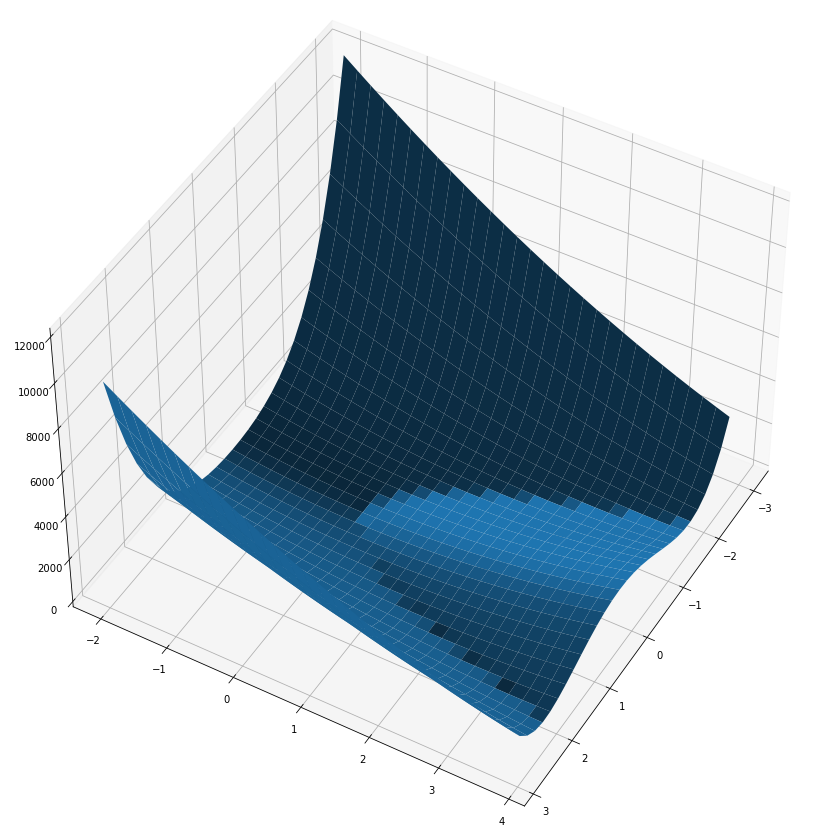

In [63]:
import matplotlib.pyplot as plt
graph = plt.figure(figsize=[25, 15])
ax = graph.add_subplot(projection='3d')
ax.view_init(45, 30)
x1 = np.arange(-3, 3, 0.2)
x2 = np.arange(-2, 4, 0.2)
x1, x2 = np.meshgrid(x1, x2)
y = func_rosen(np.array([x1,x2]))
surf = ax.plot_surface(x1, x2, y)
plt.show()

Если внимательно посмотреть на график, можно увидеть **долину параболической формы**, о которой мы говорили ранее.

Теперь, когда нам доступно визуальное представление функции, давайте попробуем её оптимизировать. Начнём с простых методов.

Алгоритмом оптимизации, в котором вычисляются только значения функций, является [метод Пауэлла](https://en.wikipedia.org/wiki/Powell's_method). Чтобы использовать его, необходимо установить `method = 'powell'` в функции `minim`.

>Мы выбрали данный метод потому, что он является самым простым из возможных в плане реализации и используемых вычислений. В следующем модуле мы комплексно рассмотрим все методы и поговорим о том, как выбрать нужный.

In [64]:
from scipy.optimize import minimize
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
result_point = minimize(func_rosen, x1, method='powell')
print(result_point.x)

[1. 1. 1. 1. 1.]


Итак, мы нашли точку минимума одним из методов. Теперь давайте используем для этого другой алгоритм.

Допустим, у нас есть некоторая точка $x_0$ в пятимерном пространстве. Найдём ближайшую к ней точку минимума функции Розенброка, используя алгоритм [метода Нелдера — Мида](https://ru.wikipedia.org/wiki/Метод_Нелдера_—_Мида) (также его называют **симплекс-методом**):

In [72]:
from scipy.optimize import minimize
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
result_point = minimize(func_rosen, x1, method='nelder-mead')
print(result_point.x)

[1.02760651 1.05589639 1.11509457 1.2440091  1.54862169]


Найденная точка следующая (заметьте, что результаты отличаются от полученных предыдущим методом, но это нормально).

Симплекс-метод является стандартным методом **линейного программирования** для решения задачи оптимизации, в которой есть функция и несколько ограничений, выраженных в виде неравенств. Неравенства определяют область в форме многоугольника, в одной из вершин которого обычно находится решение. Симплекс-метод представляет собой систематическую процедуру проверки вершин как возможных решений.

**Задание 4.5**

Оптимизируйте функцию Розенброка с помощью уже известного вам метода наименьших квадратов с использованием той же точки, которая фигурировала в наших решениях до этого.

Для реализации этого алгоритма используется функция `least_squares`.

>Мы используем этот метод, так как он хорошо подходит для задач безусловной оптимизации и считается методом первого выбора, если необходимо оптимизировать функцию, для которой нет ограничений.

In [77]:
from scipy.optimize import least_squares
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
result_point = least_squares(func_rosen, x1)
print(result_point.x)

[0.93865173 0.88210868 0.776457   0.60278764 0.36076161]


# 5. Условные экстремумы. Метод Лагранжа <a class="anchor" id=5></a>

[к содержанию](#0)

Мы узнали, как в целом формулируется задача оптимизации и из каких элементов она состоит. Теперь настало время познакомиться с наиболее популярными алгоритмами, которые используются для оптимизации функций. Первым будет метод, который подходит для решения задачи условной оптимизации, — **метод Лагранжа**.

Представим, что мы хотим решить задачу классификации и столкнулись с довольно частым случаем, когда наши данные являются линейно неразделимыми, то есть объекты нельзя разделить на классы прямой или гиперплоскостью. Это может выглядеть следующим образом:

<img src=m5_htm1.htm>

Как видно по данному графику, точки нельзя явным образом разделить на две группы, а вот на графике ниже такое возможно:

<img src=m5_img23.png width=400>

Если для исследуемых данных не существует прямой или плоскости, с помощью которых можно поделить выборку на два класса, хорошим методом для решения задачи считается **метод опорных векторов** (`SVM`). Алгоритм `SVM` подбирает гиперплоскость таким образом, чтобы выполнялось два условия:

* минимальная ошибка разделения на классы;

* максимально возможное расстояние от разделяющей гиперплоскости до ближайшей точки.

Иллюстрацию этой идеи можно увидеть ниже:

<img src=m5_img24.png width=400>

Так как данные обычно не так хорошо разделимы, как изображено выше, используется перенос данных в пространство такой размерности, где они становятся разделимыми:

<img src=m5_img25.png width=600>

Здесь задачей оптимизации является минимизация ошибки разделения выборки, и именно эта задача как раз и может быть решена методом Лагранжа.

>**Метод множителей Лагранжа** является стратегией обнаружения минимумов и максимумов дифференцируемых функций (то есть таких функций, для которых можно найти производную) при условии ограничений равенства на его независимые переменные.

В случае безусловной оптимизации мы решали задачи, приравнивая к нулю производную функции одной переменной или все частные производные в многомерном случае. Далее мы находили экстремумы и выбирали минимум или максимум. В случае с поиском решения задачи условной оптимизации алгоритм будет похож, но в него будут внесены некоторые коррективы.

Давайте перейдём к практике и рассмотрим, как формулируется и решается задача оптимизации, в которой есть ограничения.

Пусть у нас есть функция $f(x)$, для которой мы хотим найти минимум при ограничении $\phi_i (x) = 0$. Можно записать это следующим образом:

$min_{\phi_i (x) = 0} \ f(x)$

Чтобы решить такую задачу, в первую очередь записываем функцию Лагранжа, т. е. объединяем с её помощью саму целевую функцию и функцию ограничений внутри одного выражения:

$L(x, \lambda) = f(x) + \sum \lambda_i \phi_i (x)$

>Дополнительные переменные $\lambda_i$, которые появляются при формулировании функции Лагранжа, называются **множителями Лагранжа**.

По сути, с помощью создания такой новой функции мы свели задачу к уже известной нам задаче безусловной оптимизации. Вы умеете её решать и можете догадаться, что далее вычисляются частные производные построенной функции Лагранжа по $x$ и дополнительной переменной $\lambda$. Затем находятся точки, в которых производные равны нулю, и точки экстремума.

Разберём алгоритм применения метода множителей Лагранжа на конкретном примере. Представим, что мы хотим максимизировать следующую функцию:

$f(x,y) = 2x + y$

Однако мы хотим не просто найти её максимально возможное значение (на самом деле оно равно бесконечности, если на  и  не стоит никаких ограничений), а сделать это при условии выполнения следующего равенства:

$x^2 + y^2 = 1$

Если представить условие визуально, оно выглядит как окружность на координатной плоскости:

<img src=m5_img26.png width=400>

Мы хотим найти такую точку этой окружности, для которой значение функции $f(x,y) = 2x + y$ будет максимально возможным. Или, если переформулировать задачу, приведя её к задаче минимизации, мы ищем точку окружности, для которой значение функции $f(x,y) = -2x - y$ будет наименьшим. Ранее мы говорили, что обычно все задачи оптимизации сводятся к поиску минимума. Однако важно помнить, что ровно так же мы можем решать и задачи поиска максимума. Данную задачу решим в её первозданном виде. Именно для метода Лагранжа оба подхода (и поиск максимума, и поиск минимума) являются абсолютно симметричными.

Для того чтобы решить данную задачу, нам необходимо написать функцию Лагранжа. В общем виде она выглядит следующим образом:

<img src=m5_img27.png width=400>

Здесь $f(x,y)$ — это сама функция, $g(x,y)-c$ — функция ограничений, $\lambda$ — множитель Лагранжа.



В данном случае все эти элементы функции Лагранжа принимают следующий вид:

<img src=m5_img28.png width=300>

Сама функция записывается следующим образом:

<img src=m5_img29.png width=400>

Первым делом мы должны найти частные производные по каждой переменной:

$L'_x = (2x + y + \lambda x^2 + \lambda y^2 - \lambda)'_x = 2 + 2 \lambda x$

$L'_y = (2x + y + \lambda x^2 + \lambda y^2 - \lambda)'_y = 1 + 2 \lambda y$

$L'_{\lambda} = (2x + y + \lambda x^2 + \lambda y^2 - \lambda)'_{\lambda} = x^2 + y^2 - 1$

Теперь приравняем их к нулю и решим систему уравнений:

$\left\{\begin{matrix} 2 + 2 \lambda x = 0 \\ 1 + 2 \lambda y = 0 \\ x^2 + y^2 - 1 = 0\end{matrix}\right.$

$x = -\frac{2}{2 \lambda} = -\frac{1}{\lambda}, \ y = -\frac{1}{2 \lambda}$

$(-\frac{1}{\lambda})^2 + (-\frac{1}{2 \lambda})^2 - 1 = 0$

$\frac{1}{\lambda^2} + \frac{1}{4 \lambda^2} - 1 = 0$

$\lambda_1 = \frac{\sqrt{5}}{2}, \ \lambda_2 = - \frac{\sqrt{5}}{2}$

$x_1 = -\frac{2}{\sqrt{5}}, \ x_2 = \frac{2}{\sqrt{5}}$

$y_1 = -\frac{1}{\sqrt{5}}, \ y_2 = \frac{1}{\sqrt{5}}$

Для определения точек максимума и минимума найдём значения целевой функции в найденных точках:

$(- \frac{2}{\sqrt{5}}; - \frac{1}{\sqrt{5}}): 2x + y =- \frac{4}{\sqrt{5}} - \frac{1}{\sqrt{5}} = - \frac{5}{\sqrt{5}} = - \sqrt{5} \approx -2.24$

$(\frac{2}{\sqrt{5}}; \frac{1}{\sqrt{5}}): 2x + y = \frac{4}{\sqrt{5}} + \frac{1}{\sqrt{5}} = \frac{5}{\sqrt{5}} = \sqrt{5} \approx 2.24$

Получаем, что в первой точке — **минимум**, а во второй — **максимум**.

In [44]:
from sympy import Symbol, Eq, solve, diff

x = Symbol('x') 
y = Symbol('y') 
z = Symbol('z')
f = 4*x+3*y+z*(x**2+y**2-1) # запишем функцию Лагранжа
f_1 = 4*x+3*y # запишем исходную функцию
f_x = diff(f,x) # найдём частные производные от ф-и Ларанжа
f_y = diff(f,y)
f_z = diff(f,z)
sol = solve([Eq(f_x,0), Eq(f_y,0), Eq(f_z,0)], [x, y, z]) # разрешим систему уравнений собраную из частных производныйх
print('Значение функции в минимуме:',f_1.subs([(x, sol[0][0]),(y,sol[0][1])])) # подставим в исходную функцию координаты точек экстремума
print('Значение функции в минимуме:',f_1.subs([(x, sol[1][0]),(y,sol[1][1])]))

Значение функции в минимуме: -5
Значение функции в минимуме: 5


**Пример № 1**

Длина забора — 20 метров. Какова максимальная площадь прямоугольного участка, который можно огородить?

Сформулируем **задачу оптимизации**. Пусть мы будем огораживать прямоугольник со сторонами $x_1$ и $x_2$. Нам необходимо максимизировать площадь при периметре, равном 20 м.

Получается, что мы должны максимизировать функцию $f(x_1,x_2)=x_1\cdot x_2$ при условии $2x_1+2x_2=20$.

Переформулируем задачу максимизации в задачу минимизации и упростим наше ограничение:

$min_{x_1 + x_2 - 10 = 0} - x_1 x_2$

Запишем функцию Лагранжа:

$L(x_1,x_2,\lambda)=-x_1\cdot x_2+\lambda(x_1+x_2-10)$

Найдём частные производные:

$L'_{x_{1}} = -x_2 + \lambda_1$

$L'_{x_{2}} = -x_1 + \lambda_1$

$L'_{\lambda} = x_1 + x_2 -10$

Приравняем их к нулю:

$\left\{\begin{matrix} -x_2 + \lambda_1 = 0 \\ -x_1 + \lambda_1 = 0 \\ x_1 + x_2 = 10\end{matrix}\right.$

У нас получилась система линейных уравнений, которую мы можем решить, например, с помощью метода Гаусса, который вы изучали в модуле по линейной алгебре. Это отличная возможность увидеть его применение в оптимизации.

<img src=m5_img30.png>

А можно не выёбываться что умеешь в Гаусса и решить по старинке:

$\left\{\begin{matrix} -x_1+\lambda = 0 \\ -x_2 + \lambda = 0 \\ x_1+x_2 = 10\end{matrix}\right. \Rightarrow \left\{\begin{matrix} x_1=\lambda \\ x_2 = \lambda \\ \lambda +\lambda = 10\end{matrix}\right.$

$\left\{\begin{matrix} x_1+x_2 = 10 \\ x_2 + \lambda = 10 \\ 2\lambda = 10\end{matrix}\right. \Rightarrow \left\{\begin{matrix} x_1=5 \\ x_2 = 5 \\ \lambda = 5\end{matrix}\right.$

Получаем искомые $x_1$ и $x_2$, т. е. наибольшая площадь будет у квадрата $5 × 5$. Таким образом, максимальная площадь, которую можно огородить, равна $25м^2$.

**Пример № 2**

Вы управляете фабрикой, производящей изделия, в качестве сырья для которых требуется сталь. Ваши затраты — это преимущественно человеческий труд, который вы оплачиваете из расчёта 20 долларов в час для каждого рабочего, и сама сталь, которая стоит 170 долларов за тонну. Предположим, что функция $R$, прогнозирующая ваш доход, приблизительно моделируется следующим уравнением:

$R(h,s) = 200 h^{\frac{2}{3}} s^{\frac{1}{3}}$

В данном уравнении за $h$ обозначается число человеко-часов, а за $s$ — тонны стали.

Необходимо найти максимально возможный доход, если на затраты мы можем взять из бюджета только 20 000 долларов.

***

Учитывая наши ограничения на оплату труда рабочих и закупку стали, можем записать функцию ограничений:

$20h - 170s=20000$

У нас есть целевая функция и функция ограничений — можно переходить к составлению функции Лагранжа:

$L(h,s, \lambda) = 200 h^{\frac{2}{3}} s^{\frac{1}{3}} - \lambda (20 h + 170 s - 20000)$

Найдём все частные производные:

$L'_h = \frac{\partial}{\partial h} (200 h^{\frac{2}{3}} s^{\frac{1}{3}} - \lambda (20 h + 170 s - 20000)) = 200 \cdot \frac{2}{3} h^{- \frac{1}{3}} s^{\frac{1}{3}} - 20 \lambda$

$L'_s = \frac{\partial}{\partial s} (200 h^{\frac{2}{3}} s^{\frac{1}{3}} - \lambda (20 h + 170 s - 20000)) = 200 \cdot \frac{1}{3} h^{\frac{2}{3}} s^{- \frac{2}{3}} - 170 \lambda$

$L'_{\lambda} = \frac{\partial}{\partial \lambda} (200 h^{\frac{2}{3}} s^{\frac{1}{3}} - \lambda (20 h + 170 s - 20000)) = -20 h - 170 s + 20000$

Далее приравниваем все частные производные к нулю и решаем следующую систему уравнений:

$\left\{\begin{matrix} 200 \cdot \frac{2}{3} h^{- \frac{1}{3}} s^{\frac{1}{3}} - 20 \lambda = 0 \\ 200 \cdot \frac{1}{3} h^{\frac{2}{3}} s^{- \frac{2}{3}} - 170 \lambda = 0 \\ 20 h + 170 s = 20000\end{matrix}\right.$

>Разумеется, при решении прикладных задач «красивые» ответы обычно не получаются, поэтому проще решать такие системы с помощью `Python` или любым удобным для вас способом (чуть далее мы рассмотрим полностью программное решение).

Получаем следующие ответы:

$h = \frac{2000}{3} \approx 666.667$

$s = \frac{2000}{51} \approx 39.2157$

$\lambda = \sqrt[3]{\frac{8000}{459}} \approx 2.593$

Если бы работники выполняли свои обязанности дробное количество часов или если бы мы покупали сталь килограммами, то, в целом, полученные значения уже можно было бы использовать для вычисления итоговой прибыли. Но иногда мы обязаны округлять значения — так и поступим:

$R(667,39) = 200(667)^{\frac{2}{3}} (39)^{\frac{1}{3}} \approx \$ 51.777$

Таким образом, мы получили максимально возможную прибыль при условии обозначенных затрат.

In [81]:
from sympy import Symbol, Eq, solve, diff, re

x = Symbol('x') 
y = Symbol('y') 
z = Symbol('z')
f = 200*x**(2/3)*y**(1/3)-z*(20*x+170*y-20000) # запишем функцию Лагранжа
f_1 = 200*x**(2/3)*y**(1/3) # запишем исходную функцию

f_x = diff(f,x) # найдём частные производные от ф-и Ларанжа
f_y = diff(f,y)
f_z = diff(f,z)

sol = solve([Eq(f_x,0), Eq(f_y,0), Eq(f_z,0)], [x, y, z]) # разрешим систему уравнений собраную из частных производныйх

print(f'Максимальная прибыль: {round(f_1.subs([(x,re(sol[0][0])),(y,re(sol[0][1]))]))}$')
print(f'При параметрах: {round(re(sol[0][0]),2)} чел/час; {round(re(sol[0][1]),2)} т. стали')



Максимальная прибыль: 51855$
При параметрах: 666.67 чел/час; 39.22 т. стали


**Пример № 3**

У нас есть два станка для производства пластиковых упаковок. Станки разных моделей, поэтому при их использовании получаются разные издержки, зависящие от произведённых упаковок и выражаемые следующими функциями:

$g(a) = 3a^2 + a$

$g(b) = 4b + 5b^2$

Здесь $a$ — это количество упаковок, произведённых на первом станке, а $b$ — количество упаковок, произведённых на втором станке.

Нам заказали 200 упаковок. Мы хотим выполнить заказ, минимизировав расходы на изготовление товаров. Чтобы узнать, как мы можем сэкономить, необходимо решить задачу оптимизации.

Составим  нашу целевую функцию:

$f(a,b) = 3a^2 + a + 4b + 5b^2$

Запишем функцию ограничений:

$\phi(a,b) = a + b - 200 = 0$

Составим функцию Лагранжа:

$L(a,b, \lambda) = 3a^2 + a + 4b + 5b^2+ \lambda \cdot (a + b - 200)$

Найдём первые производные и приравним их к нулю:

$L'_a = 6a + 1 + \lambda = 0$

$L'_b = 4 + 10b + \lambda = 0$

$L'_{\lambda} = a + b - 200 = 0$

Найдём решения системы:

$\left\{\begin{matrix} a = 125.1875 \\ b = 74.8125 \\ \lambda = -752.125 \end{matrix}\right.$

In [84]:
from sympy import *
a,b,w=symbols(' a b w' )
g = 3*a**2 + a + 4*b + 5*b**2
print('Целевая функция для аргументов a и b : f = ', g)
q = a + b - 200
print('Функция ограничений: ', q,'= 0')
f = 3*a**2 + a + 4*b + 5*b**2 + w*(a + b - 200)
print('Функция Лагранжа : ',f)
fa = f.diff(a)
print('df/da =',fa,'= 0')
fb = f.diff(b)
print('df/db =',fb,'= 0')
fw = f.diff(w)
print('df/dw =',fw,'= 0')
sols = solve([fa,fb,fw],a,b,w)
print('Стационарная точка M(x,y):\n',float(sols[a]),',',float(sols[b]))

Целевая функция для аргументов a и b : f =  3*a**2 + a + 5*b**2 + 4*b
Функция ограничений:  a + b - 200 = 0
Функция Лагранжа :  3*a**2 + a + 5*b**2 + 4*b + w*(a + b - 200)
df/da = 6*a + w + 1 = 0
df/db = 10*b + w + 4 = 0
df/dw = a + b - 200 = 0
Стационарная точка M(x,y):
 125.1875 , 74.8125


**Задание 5.3**

Представьте, что вы решаете задачу классификации методом опорных векторов и хотите оценить расстояние от объекта до разделяющей прямой с помощью метода Лагранжа. Если объект имеет координаты $(2;1)$, а прямая задана уравнением $x+y=1$, то каким будет квадрат расстояния от этого объекта до прямой?

In [131]:
from sympy import Symbol, Eq, solve, diff
x = Symbol('x')
y = Symbol('y')
z = Symbol('z')
f_1 = ((x-2)**2+(y-1)**2)**(1/2)
f = ((x-2)**2+(y-1)**2)**(1/2) + z*(x+y-1)
f_0 = x+y-1
fx = diff(f,x)
fy = diff(f,y)
fz = diff(f,z)
sols = solve([fx,fy,fz],x,y,z)
print('Целевая функция:', f_1)
print('Функция ограничений: ', f_0)
print('Функция Лагранжа :',f)
print('df/dx =',fx,'= 0')
print('df/dy =',fy,'= 0')
print('df/dz =',fz,'= 0')
print(f'Минимальное расстояние: {f_1.subs([(x,sols[0][0]),(y,(sols[0][1]))])}')




Целевая функция: ((x - 2)**2 + (y - 1)**2)**0.5
Функция ограничений:  x + y - 1
Функция Лагранжа : z*(x + y - 1) + ((x - 2)**2 + (y - 1)**2)**0.5
df/dx = z + (1.0*x - 2.0)/((x - 2)**2 + (y - 1)**2)**0.5 = 0
df/dy = z + (1.0*y - 1.0)/((x - 2)**2 + (y - 1)**2)**0.5 = 0
df/dz = x + y - 1 = 0
Минимальное расстояние: 1.41421356237310


**Задание 5.4**

Прямоугольный параллелепипед имеет объём $1м^2$. Чему равна минимальная площадь его поверхности?

In [138]:
from sympy import Symbol, Eq, solve, diff
a,b,c,z,V = symbols('a b c z V')
S = 2*(a*b+b*c+a*c)
V = a*b*c
f = S + z*(V-1)
fa = diff(f,a)
fb = diff(f,b)
fc = diff(f,c)
fz = diff(f,z)
sols = solve([fa,fb,fc,fz],a,b,c,z)
print('Целевая функция:', S)
print('Функция ограничений: ', V-1)
print('Функция Лагранжа :',f)
print('df/da =',fa,'= 0')
print('df/db =',fb,'= 0')
print('df/dc =',fc,'= 0')
print('df/dz =',fz,'= 0')
print(f'Минимальное площадь поверхности: {S.subs([(a,sols[0][0]),(b,(sols[0][1])),(c,(sols[0][2]))])}')


Целевая функция: 2*a*b + 2*a*c + 2*b*c
Функция ограничений:  a*b*c - 1
Функция Лагранжа : 2*a*b + 2*a*c + 2*b*c + z*(a*b*c - 1)
df/da = b*c*z + 2*b + 2*c = 0
df/db = a*c*z + 2*a + 2*c = 0
df/dc = a*b*z + 2*a + 2*b = 0
df/dz = a*b*c - 1 = 0
Минимальное площадь поверхности: 6


[{a: 1, b: 1, c: 1, z: -4},
 {a: -1/2 - sqrt(3)*I/2,
  b: -1/2 - sqrt(3)*I/2,
  c: -1/2 - sqrt(3)*I/2,
  z: 2 - 2*sqrt(3)*I},
 {a: -1/2 + sqrt(3)*I/2,
  b: -1/2 + sqrt(3)*I/2,
  c: -1/2 + sqrt(3)*I/2,
  z: 2 + 2*sqrt(3)*I}]

# 6. Градиент и антиградиент <a class="anchor" id=6></a>

[к содержанию](#0)

# 7. Градиент и градиентный спуск <a class="anchor" id=7></a>

[к содержанию](#0)

# 8. Практика. Градиентный спуск <a class="anchor" id=8></a>

[к содержанию](#0)

# 9. Итоги <a class="anchor" id=9></a>

[к содержанию](#0)